## Ejercicios con Python Tarea Clase 18
### Pablo Ángel Mendoza Aguirre

Valuación Opcion Europea 'PUT', CALL'
Programa valuación opción Europea 'PUT'. Se debe de entragar un cuaderno de python donde se simule la valuación de opciones 'PUT', siguiendo los siguientes lineamientos:

1. Valuar la opción considerando una opción con fecha de cierre mayor a 200 días. Valuar opciones para dos activos que deseen, diferentes a los tomados en clase.

2. Repetir el inciso anterior, pero en este caso analizar una opción de venta tal que la fecha de cierre sea menor a 100 días.

3. Cada uno de los numerales anteriores, deben de evaluarse con los dos métodos vistos en clase: suponiendo que los rendimientos son normales y utilizando el método del histograma para generar los rendimientos simulados.

4. Analizar la precisión del valor del precio obtenido usando monte carlo para cada uno de los métodos nombrados en el numeral anterior y comparar la valuación para la opción con fecha de cierre de 200 y 100 días respectivamente. ¿Mejoró la precisión disminuyendo o aumentando el número de días en la feche de cierre de la opción analizada?. Justifique su respuesta

In [10]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [11]:
ma = web.YahooOptions('YELP') #Yelp Inc
ma_opt = ma.get_all_data().reset_index()
ford = web.YahooOptions('F') #Ford
ford_opt = ford.get_all_data().reset_index()

In [12]:
type(ma)

pandas_datareader.yahoo.options.Options

In [24]:
# Función para descargar precios de cierre ajustados de varios activos a la vez:
def get_historical_closes(tickers, start_date=None, end_date=None, freq=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Frecuencia de muestreo por defecto (freq='d')
    # Importamos paquetes necesarios
    import pandas as pd
    pd.core.common.is_list_like = pd.api.types.is_list_like
    import pandas_datareader.data as web  
    # Creamos DataFrame vacío de precios, con el índice de las fechas
    closes = pd.DataFrame(columns = tickers, index=web.YahooDailyReader(symbols=tickers[0], start=start_date, end=end_date, interval=freq).read().index)
    # Agregamos cada uno de los precios con YahooDailyReader
    for ticker in tickers:
        df = web.YahooDailyReader(symbols=ticker, start=start_date, end=end_date, interval=freq).read()
        closes[ticker]=df['Adj Close']
    closes.index_name = 'Date'
    closes = closes.sort_index()
    return closes
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

### Opciones de Yahoo Finance para Comparar Resultados
Como punto de comparación, se tomaran de referencia las siguiente opciones de Yelp Inc, siendo put_LP1 la opción put con fecha de cierre mayor a 200 días y put_CP1 la opción put con fecha de cierre menor a 100 días. Por otra parte, se tomaran de referencia las siguiente opciones de Ford Motor Company, siendo put_LP2 la opción put con fecha de cierre mayor a 200 días y put_CP2 la opción put con fecha de cierre menor a 100 días.

In [25]:
put_LP1 = ma_opt.loc[(ma_opt.Expiry=='2019-05-17') & (ma_opt.Type=='put') & (ma_opt.Strike==32.0)]#218 días
put_LP1

,Strike,Expiry,Type,Symbol,Last,...,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON
144,32.0,2019-05-17,put,YELP190517P00032000,4.55,...,YELP,31.37,2018-11-27 21:01:45,2018-11-27 14:50:39,"{'contractSymbol': 'YELP190517P00032000', 'str..."


In [26]:
put_CP1 = ma_opt.loc[(ma_opt.Expiry=='2019-01-18') & (ma_opt.Type=='put') & (ma_opt.Strike==32.0)]#68 días
put_CP1

,Strike,Expiry,Type,Symbol,Last,...,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON


In [27]:
put_LP2 = ford_opt.loc[(ford_opt.Expiry=='2020-01-17') & (ford_opt.Type=='put') & (ford_opt.Strike==10.0)]#427 días
put_LP2

,Strike,Expiry,Type,Symbol,Last,...,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON
136,10.0,2020-01-17,put,F200117P00010000,1.6,...,F,9.28,2018-11-27 21:01:01,2018-11-26 19:35:23,"{'contractSymbol': 'F200117P00010000', 'strike..."


In [28]:
put_CP2 = ford_opt.loc[(ford_opt.Expiry=='2019-01-18') & (ford_opt.Type=='put') & (ford_opt.Strike==10.0)]#68 días 
put_CP2

,Strike,Expiry,Type,Symbol,Last,...,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON
130,10.0,2019-01-18,put,F190118P00010000,0.86,...,F,9.28,2018-11-27 21:01:01,2018-11-27 20:12:05,"{'contractSymbol': 'F190118P00010000', 'strike..."


### Precios de los Activos a lo Largo del Tiempo

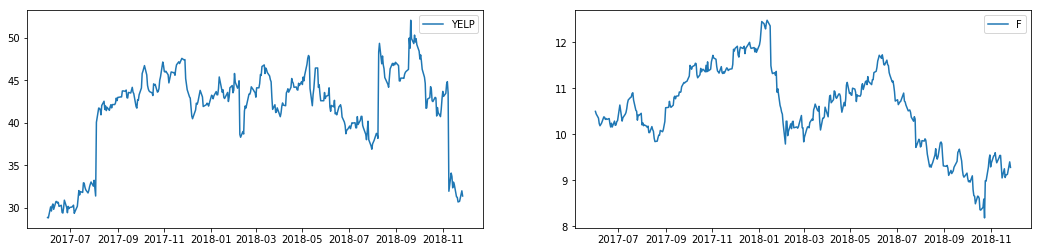

In [29]:
ticker1 = ['YELP']
ticker2 = ['F']
start_date = '2017-06-01'
closes_ma = get_historical_closes(ticker1, start_date,freq='d')
closes_ford = get_historical_closes(ticker2, start_date,freq='d')
plt.figure(figsize = (18,4))
plt.subplot(121)
plt.plot(closes_ma)
plt.legend(ticker1)
plt.subplot(122)
plt.plot(closes_ford)
plt.legend(ticker2)
plt.show()

In [30]:
type(closes_ma.index)

pandas.core.indexes.datetimes.DatetimeIndex

### Rendimientos de los Activos

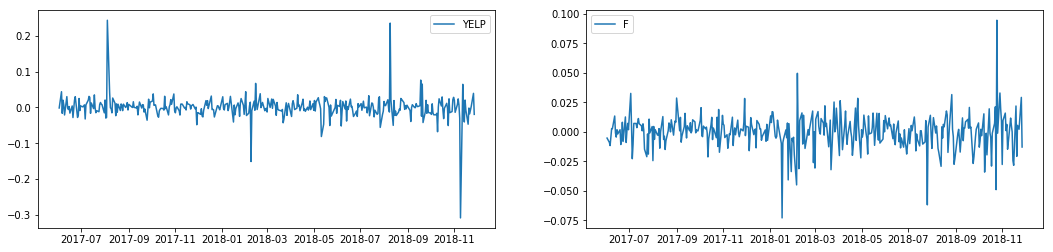

In [31]:
ret_ma = calc_daily_ret(closes_ma)
ret_ford = calc_daily_ret(closes_ford)
plt.figure(figsize = (18,4))
plt.subplot(121)
plt.plot(ret_ma)
plt.legend(ticker1)
plt.subplot(122)
plt.plot(ret_ford)
plt.legend(ticker2)
plt.show()

### Valuación Opción Put Europeo a más de 200 días de Yelp Inc

#### Suponiendo Rendimientos Normales

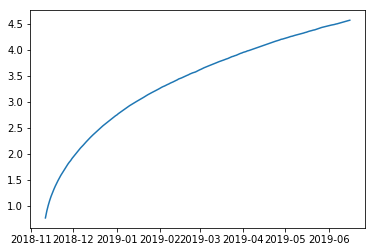

Prima de la Opción Yahoo Finance
3.8
Prima de la Opción Calculada
Prima    4.574
Name: 2019-06-16 00:00:00, dtype: float64
Intervalo de Confianza de 90%
(4.481493296385809, 4.66659346801921)
(4.481494153765342, 4.666592610639676)


In [32]:
mu = ret_ma.mean()[0]
sigma = ret_ma.std()[0]
r = 0.0273/360 # Tasa diaria, r = 0.0260/360, fecha del 11 de Noviembre de 2018
K= 32  # strike price
ndays = 218
nscen = 100000
dates = pd.date_range('2018-11-11', periods = ndays)
S0 = closes_ma.iloc[-1,0]  # Condición inicial del precio a simula
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike-sim_closes,np.zeros([ndays,nscen])).T.mean()}, index=dates)
plt.plot(put)
plt.show()
print('Prima de la Opción Yahoo Finance')
print(ma_opt.loc[87,'JSON']['lastPrice'])
print('Prima de la Opción Calculada')
P_LP1_RN = put.iloc[-1]
print(put.iloc[-1])
print('Intervalo de Confianza de 90%')
confianza = 0.90
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i2)

#### Método del Histograma

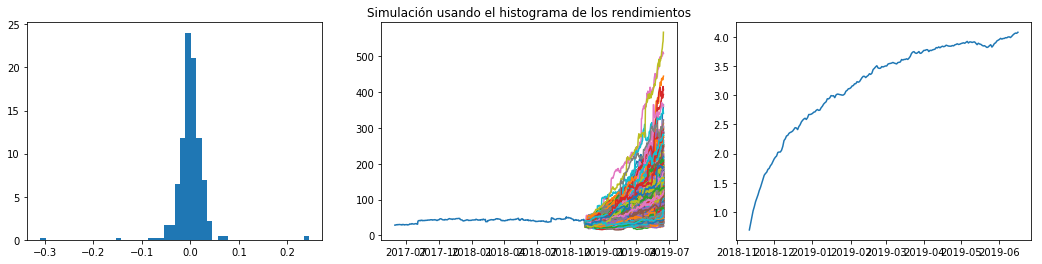

Prima de la Opción Yahoo Finance
3.8
Prima de la Opción Calculada
Prima    4.08
Name: 2019-06-16 00:00:00, dtype: float64
Intervalo de Confianza de 90%
(4.481408251521711, 4.6666785128833075)
(4.481494153765342, 4.666592610639676)


In [33]:
nscen = 1000
plt.figure(figsize = (18,4))
plt.subplot(131)
ren = calc_daily_ret(closes_ma) # rendimientos 
y,x,des = plt.hist(ren['YELP'],bins=50,density=True,label='Histograma rendimientos')
mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal# Valores máximo y mínimo de los rendiemientos a generar
plt.subplot(132)
ren_max = max(x)
ren_min = min(x)# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
prob = y/np.sum(y)
values = x[1:]
ret = np.random.choice(values, ndays*nscen, p=prob)
dates = pd.date_range('2018-11-11',periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_ma.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
plt.plot(pd.concat([closes_ma,sim_closes_hist]))
plt.title('Simulación usando el histograma de los rendimientos')
plt.subplot(133)
freq, values = np.histogram(ret_ma+r-mu, bins=2000)
prob = freq/np.sum(freq)
ret=np.random.choice(values[1:],ndays*nscen,p=prob)
dates=pd.date_range('2018-11-11',periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_ma.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
put_hist = pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike-sim_closes_hist,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
plt.plot(put_hist)
plt.show()
print('Prima de la Opción Yahoo Finance')
print(ma_opt.loc[87,'JSON']['lastPrice'])
print('Prima de la Opción Calculada')
P_LP1_H = put_hist.iloc[-1]
print(put_hist.iloc[-1])
print('Intervalo de Confianza de 90%')
confianza = 0.90
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i2)

### Valuación Opción Put Europeo a menos de 100 días de Yelp Inc

#### Suponiendo Rendimientos Normales

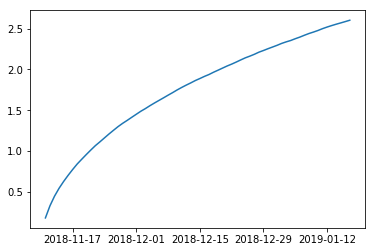

Prima de la Opción Yahoo Finance
2.3
Prima de la Opción Calculada
Prima    2.603
Name: 2019-01-17 00:00:00, dtype: float64
Intervalo de Confianza de 90%
(2.555622505445187, 2.6508596432798552)
(2.5556229465813143, 2.650859202143728)


In [12]:
mu = ret_ma.mean()[0]
sigma = ret_ma.std()[0]
r = 0.0273/360 # Tasa diaria, r = 0.0260/360, fecha del 11 de Noviembre de 2018
K= 32  # strike price
ndays = 68
nscen = 100000
dates = pd.date_range('2018-11-11', periods = ndays)
S0 = closes_ma.iloc[-1,0]  # Condición inicial del precio a simula
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike-sim_closes,np.zeros([ndays,nscen])).T.mean()}, index=dates)
plt.plot(put)
plt.show()
print('Prima de la Opción Yahoo Finance')
print(ma_opt.loc[83,'JSON']['lastPrice'])
print('Prima de la Opción Calculada')
P_CP1_RN = put.iloc[-1]
print(put.iloc[-1])
print('Intervalo de Confianza de 90%')
confianza = 0.90
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i2)

#### Método del Histograma

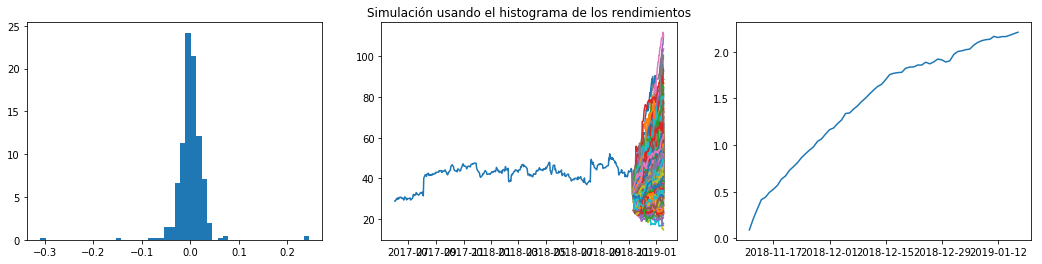

Prima de la Opción Yahoo Finance
2.3
Prima de la Opción Calculada
Prima    2.209
Name: 2019-01-17 00:00:00, dtype: float64
Intervalo de Confianza de 90%
(2.5555787484385206, 2.6509034002865217)
(2.5556229465813143, 2.650859202143728)


In [13]:
nscen = 1000
plt.figure(figsize = (18,4))
plt.subplot(131)
ren = calc_daily_ret(closes_ma) # rendimientos 
y,x,des = plt.hist(ren['YELP'],bins=50,density=True,label='Histograma rendimientos')
mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal# Valores máximo y mínimo de los rendiemientos a generar
plt.subplot(132)
ren_max = max(x)
ren_min = min(x)# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
prob = y/np.sum(y)
values = x[1:]
ret = np.random.choice(values, ndays*nscen, p=prob)
dates = pd.date_range('2018-11-11',periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_ma.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
plt.plot(pd.concat([closes_ma,sim_closes_hist]))
plt.title('Simulación usando el histograma de los rendimientos')
plt.subplot(133)
freq, values = np.histogram(ret_ma+r-mu, bins=2000)
prob = freq/np.sum(freq)
ret=np.random.choice(values[1:],ndays*nscen,p=prob)
dates=pd.date_range('2018-11-11',periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_ma.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
put_hist = pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike-sim_closes_hist,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
plt.plot(put_hist)
plt.show()
print('Prima de la Opción Yahoo Finance')
print(ma_opt.loc[83,'JSON']['lastPrice'])
print('Prima de la Opción Calculada')
P_CP1_H = put_hist.iloc[-1]
print(put_hist.iloc[-1])
print('Intervalo de Confianza de 90%')
confianza = 0.90
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i2)

### Valuación Opción Put Europeo a más de 200 días de Ford Motor Company

#### Suponiendo Rendimientos Normales

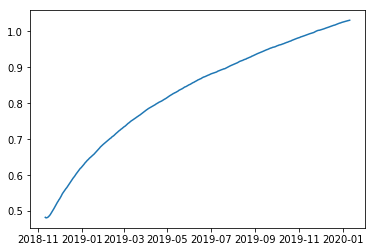

Prima de la Opción Yahoo Finance
1.57
Prima de la Opción Calculada
Prima    1.031
Name: 2020-01-11 00:00:00, dtype: float64
Intervalo de Confianza de 90%
(1.0152294619508277, 1.0474233146353245)
(1.0152296110719776, 1.0474231655141746)


In [14]:
mu = ret_ford.mean()[0]
sigma = ret_ford.std()[0]
r = 0.0273/360 # Tasa diaria, r = 0.0260/360, fecha del 11 de Noviembre de 2018
K= 10  # strike price
ndays = 427
nscen = 100000
dates = pd.date_range('2018-11-11', periods = ndays)
S0 = closes_ford.iloc[-1,0]  # Condición inicial del precio a simula
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike-sim_closes,np.zeros([ndays,nscen])).T.mean()}, index=dates)
plt.plot(put)
plt.show()
print('Prima de la Opción Yahoo Finance')
print(ford_opt.loc[126,'JSON']['lastPrice'])
print('Prima de la Opción Calculada')
P_LP2_RN = put.iloc[-1]
print(put.iloc[-1])
print('Intervalo de Confianza de 90%')
confianza = 0.90
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i2)

#### Método del Histograma

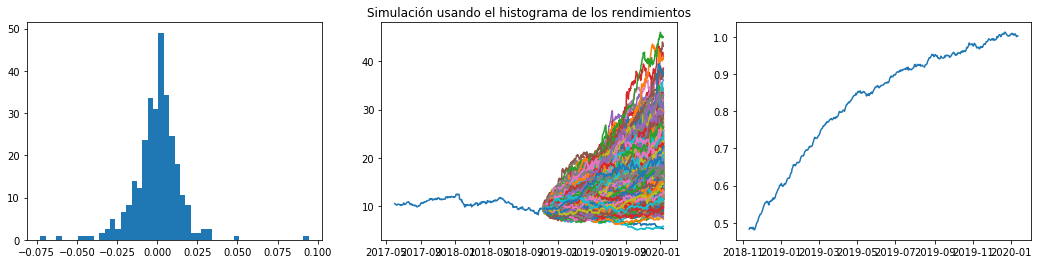

Prima de la Opción Yahoo Finance
1.57
Prima de la Opción Calculada
Prima    1.003
Name: 2020-01-11 00:00:00, dtype: float64
Intervalo de Confianza de 90%
(1.0152146703825533, 1.047438106203599)
(1.0152296110719776, 1.0474231655141746)


In [15]:
nscen = 1000
plt.figure(figsize = (18,4))
plt.subplot(131)
ren = calc_daily_ret(closes_ford) # rendimientos 
y,x,des = plt.hist(ren['F'],bins=50,density=True,label='Histograma rendimientos')
mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal# Valores máximo y mínimo de los rendiemientos a generar
plt.subplot(132)
ren_max = max(x)
ren_min = min(x)# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
prob = y/np.sum(y)
values = x[1:]
ret = np.random.choice(values, ndays*nscen, p=prob)
dates = pd.date_range('2018-11-11',periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_ford.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
plt.plot(pd.concat([closes_ford,sim_closes_hist]))
plt.title('Simulación usando el histograma de los rendimientos')
plt.subplot(133)
freq, values = np.histogram(ret_ford+r-mu, bins=2000)
prob = freq/np.sum(freq)
ret=np.random.choice(values[1:],ndays*nscen,p=prob)
dates=pd.date_range('2018-11-11',periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_ford.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
put_hist = pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike-sim_closes_hist,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
plt.plot(put_hist)
plt.show()
print('Prima de la Opción Yahoo Finance')
print(ford_opt.loc[126,'JSON']['lastPrice'])
print('Prima de la Opción Calculada')
P_LP2_H = put_hist.iloc[-1]
print(put_hist.iloc[-1])
print('Intervalo de Confianza de 90%')
confianza = 0.90
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i2)

### Valuación Opción Put Europeo a menos de 100 días de Ford Motor Company

#### Suponiendo Rendimientos Normales

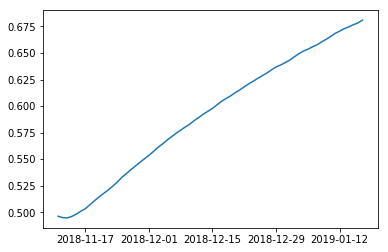

Prima de la Opción Yahoo Finance
0.7
Prima de la Opción Calculada
Prima    0.681
Name: 2019-01-17 00:00:00, dtype: float64
Intervalo de Confianza de 90%
(0.6749573027328871, 0.6867905625198595)
(0.6749573575442612, 0.6867905077084854)


In [16]:
mu = ret_ford.mean()[0]
sigma = ret_ford.std()[0]
r = 0.0273/360 # Tasa diaria, r = 0.0260/360, fecha del 11 de Noviembre de 2018
K= 10  # strike price
ndays = 68
nscen = 100000
dates = pd.date_range('2018-11-11', periods = ndays)
S0 = closes_ford.iloc[-1,0]  # Condición inicial del precio a simula
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike-sim_closes,np.zeros([ndays,nscen])).T.mean()}, index=dates)
plt.plot(put)
plt.show()
print('Prima de la Opción Yahoo Finance')
print(ford_opt.loc[120,'JSON']['lastPrice'])
print('Prima de la Opción Calculada')
P_CP2_RN = put.iloc[-1]
print(put.iloc[-1])
print('Intervalo de Confianza de 90%')
confianza = 0.90
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i2)

#### Método del Histograma

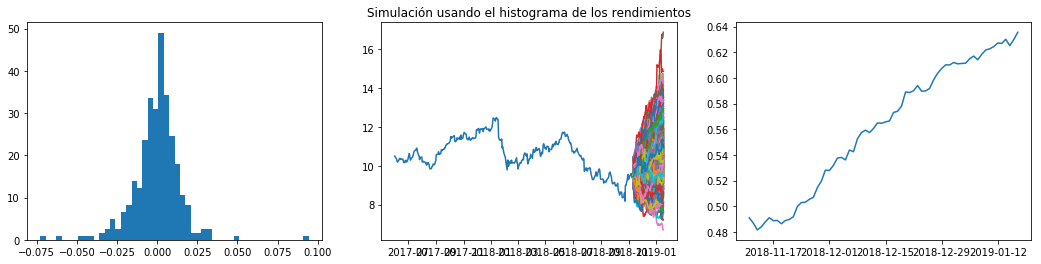

Prima de la Opción Yahoo Finance
0.7
Prima de la Opción Calculada
Prima    0.636
Name: 2019-01-17 00:00:00, dtype: float64
Intervalo de Confianza de 90%
(0.6749518659039445, 0.6867959993488021)
(0.6749573575442612, 0.6867905077084854)


In [17]:
nscen = 1000
plt.figure(figsize = (18,4))
plt.subplot(131)
ren = calc_daily_ret(closes_ford) # rendimientos 
y,x,des = plt.hist(ren['F'],bins=50,density=True,label='Histograma rendimientos')
mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal# Valores máximo y mínimo de los rendiemientos a generar
plt.subplot(132)
ren_max = max(x)
ren_min = min(x)# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
prob = y/np.sum(y)
values = x[1:]
ret = np.random.choice(values, ndays*nscen, p=prob)
dates = pd.date_range('2018-11-11',periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_ford.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
plt.plot(pd.concat([closes_ford,sim_closes_hist]))
plt.title('Simulación usando el histograma de los rendimientos')
plt.subplot(133)
freq, values = np.histogram(ret_ford+r-mu, bins=2000)
prob = freq/np.sum(freq)
ret=np.random.choice(values[1:],ndays*nscen,p=prob)
dates=pd.date_range('2018-11-11',periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_ford.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
put_hist = pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike-sim_closes_hist,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
plt.plot(put_hist)
plt.show()
print('Prima de la Opción Yahoo Finance')
print(ford_opt.loc[120,'JSON']['lastPrice'])
print('Prima de la Opción Calculada')
P_CP2_H = put_hist.iloc[-1]
print(put_hist.iloc[-1])
print('Intervalo de Confianza de 90%')
confianza = 0.90
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i2)

## Cuadro Comparativo

In [18]:
Yelp = np.round(np.array([np.float(P_LP1_RN),np.float(P_LP1_H),np.float(P_CP1_RN),np.float(P_CP1_H)]),3)
Real = np.round(np.array([np.float(ma_opt.loc[87,'JSON']['lastPrice']),np.float(ma_opt.loc[87,'JSON']['lastPrice']),np.float(ma_opt.loc[83,'JSON']['lastPrice']),np.float(ma_opt.loc[83,'JSON']['lastPrice'])]),3)
Error = (np.abs(Yelp-Real)/Real)*100
blank = np.array(['','','',''])
Ford = np.round(np.array([np.float(P_LP2_RN),np.float(P_LP2_H),np.float(P_CP2_RN),np.float(P_CP2_H)]),3)
Real2 = np.round(np.array([np.float(ford_opt.loc[126,'JSON']['lastPrice']),np.float(ford_opt.loc[126,'JSON']['lastPrice']),np.float(ford_opt.loc[120,'JSON']['lastPrice']),np.float(ford_opt.loc[120,'JSON']['lastPrice'])]),3)
Error2 = (np.abs(Ford-Real2)/Real2)*100
tabla = pd.DataFrame(columns=['Yelp','Prima Real Yelp','Error Yelp %','','Ford','Prima Real Ford','Error Ford %'],index=['Prima_Rend_Norm_200_UP','Prima_Hist_200_UP','Prima_Rend_Norm_100_DOWN','Prima_Hist_100_DOWN'])
tabla.index.name = "Prima"
tabla['Yelp'] = Yelp
tabla['Prima Real Yelp'] = Real
tabla['Error Yelp %'] = Error
tabla[''] = blank
tabla['Ford'] = Ford
tabla['Prima Real Ford'] = Real2
tabla['Error Ford %'] = Error2
tabla

,Yelp,Prima Real Yelp,Error Yelp %,,Ford,Prima Real Ford,Error Ford %
Prima,,,,,,,
Prima_Rend_Norm_200_UP,4.127,4.83,14.555,,1.031,1.57,34.331
Prima_Hist_200_UP,3.759,4.83,22.174,,1.003,1.57,36.115
Prima_Rend_Norm_100_DOWN,2.603,2.30,13.174,,0.681,0.70,2.714
Prima_Hist_100_DOWN,2.209,2.30,3.957,,0.636,0.70,9.143


## Conclusión

Del cuadro comparativo anterior, se puede observar que las opciones que tienen un menor error son las que tienen un vencimiento más cercano a la fecha actual, es decir que mejoró disminuyendo el número de días en la decha de cierre. Parece ser que lo que causa esto, es que entre más largo sea el plazo más incertidumbre se tiene en términos de probabilidad sobre si el precio Spot al vencimiento estará por encima o debajo del precio pactado (K). El método funciona mejor cuando los rendimientos se asemejan a una distribución normal. 